<div style="background-color:maroon; padding:10px;">
</div>

# AM 205 - Advanced Scientific Computing: Numerical Methods
<div style="background-color:maroon; padding:10px;">
</div>

**Harvard University**<br/>
**Fall 2024**<br/>
**Instructors**: Prof. Nick Trefethen<br/>
**Author**: Elaine Swanson

### 1. **p12_lowrankSVD.m**- low-rank approximation of an image by Gaussiam elimination complete pivoting (see p6_GEiterative.m) compared with SVD  
#### performs a low-rank approximation of an image using Gaussian elimination with complete pivoting and SVD, comparing the two approximations as the rank increases.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color
from skimage.transform import rescale

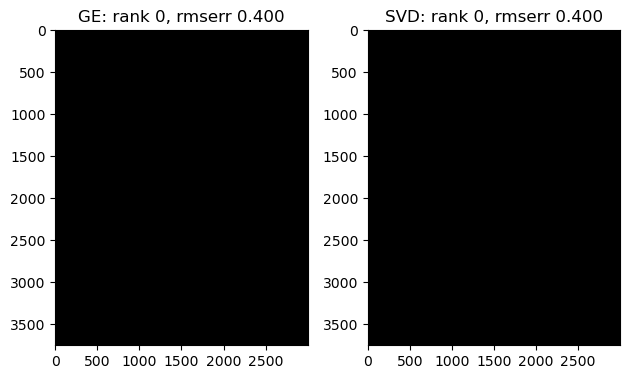

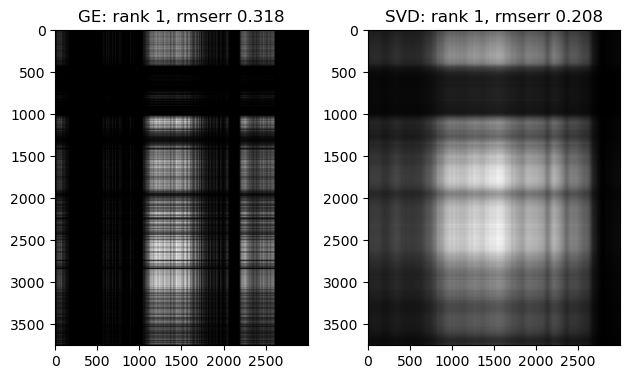

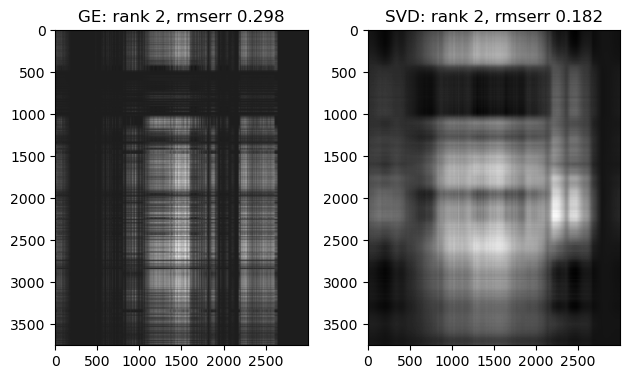

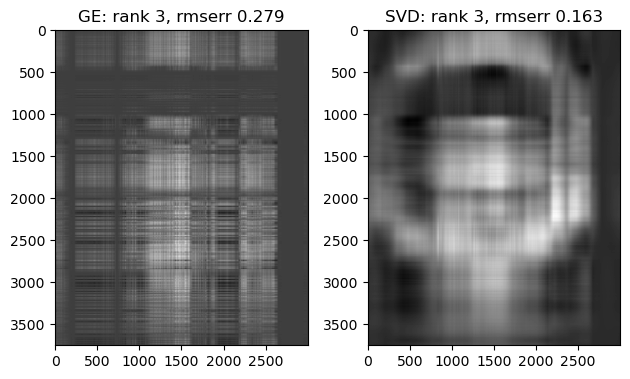

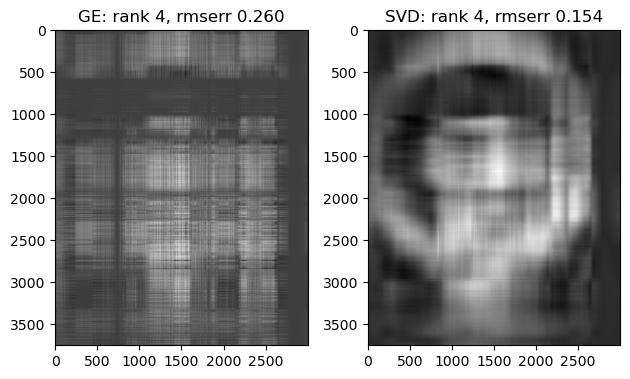

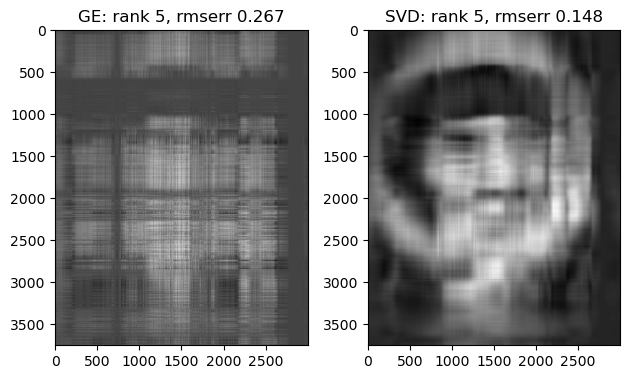

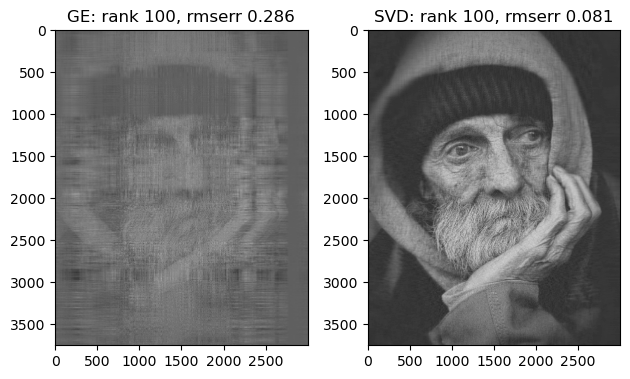

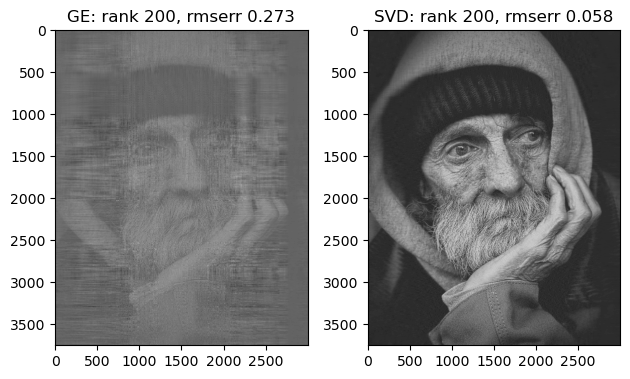

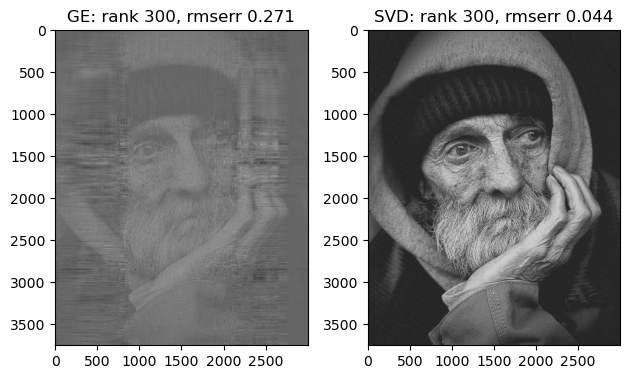

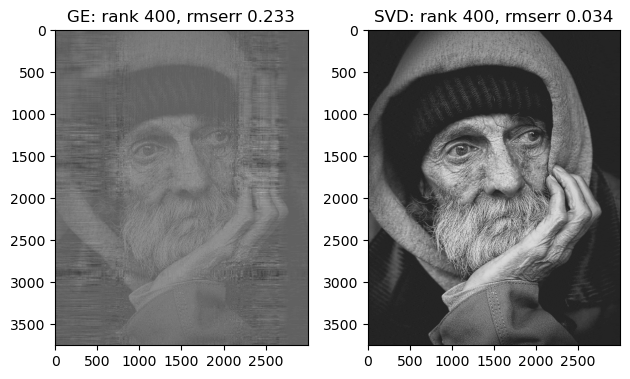

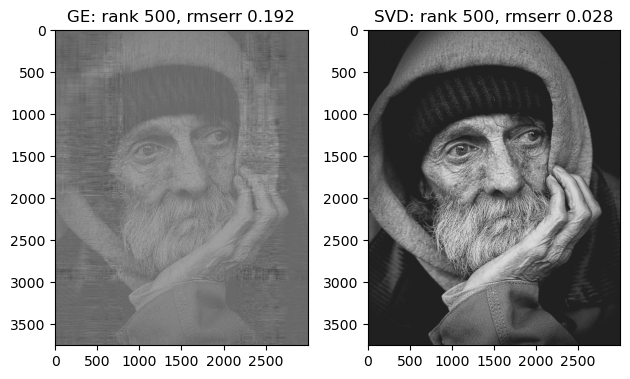

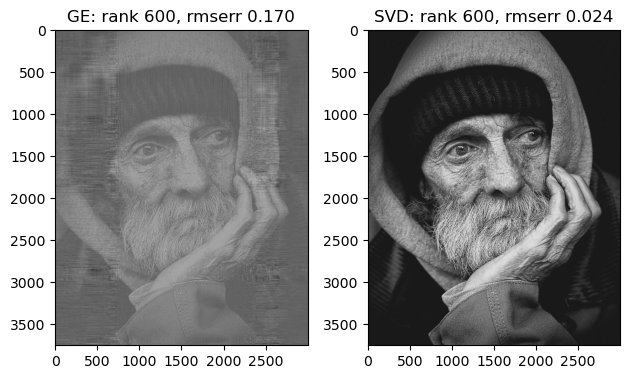


KeyboardInterrupt



In [2]:
A = io.imread('image.jpg') 
A = color.rgb2gray(A)  
A = A.astype(float)  

Ar = A.copy()  
AGEk = np.zeros_like(A) 
sq = np.sqrt(np.size(A))  

## SVD of the image
U, S, Vt = np.linalg.svd(A, full_matrices=False)
SVDk = lambda k: np.dot(U[:, :k], np.dot(np.diag(S[:k]), Vt[:k, :]))  

## Loop over different rank approx's
for k in range(len(S)):
    maxerrGE = np.max(Ar)
    
    ## plot the results at specific intervals
    if k <= 5 or k % 100 == 0:  # choosing these to for how long you have to wait. 
        ## GE approx error (Fro norm)
        errGE = np.linalg.norm(Ar, 'fro') / sq
        
        ## plot the GE result
        plt.subplot(1, 2, 1)
        plt.imshow(AGEk, cmap='gray')
        plt.title(f'GE: rank {k}, rmserr {errGE:.3f}')
        
        ## SVD approx
        ASVDk = SVDk(k)
        errSVD = np.linalg.norm(A - ASVDk, 'fro') / sq
        
        ## plot the SVD result
        plt.subplot(1, 2, 2)
        plt.imshow(ASVDk, cmap='gray')
        plt.title(f'SVD: rank {k}, rmserr {errSVD:.3f}')
        
        plt.tight_layout()
        plt.show(block=False)  
        plt.pause(0.4)  

    ## find the location of the largest entry in the current error matrix (Ar)
    i, j = np.unravel_index(np.argmax(Ar), Ar.shape)
    
    ## rank 1 outer product approximation (Gaussian Elimination)
    Ak = np.outer(Ar[:, j], Ar[i, :] / maxerrGE)
    
    ## update the GE approximation
    AGEk += Ak
    Ar -= Ak 